In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import klib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Saidabrorkhon\ML_Lectures\ML 1st month\datasets\Netflix Engagement Dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Customer ID                         3500 non-null   int64  
 1   Subscription Length (Months)        3500 non-null   int64  
 2   Customer Satisfaction Score (1-10)  3500 non-null   int64  
 3   Daily Watch Time (Hours)            3500 non-null   float64
 4   Engagement Rate (1-10)              3500 non-null   int64  
 5   Device Used Most Often              3500 non-null   object 
 6   Genre Preference                    3500 non-null   object 
 7   Region                              3500 non-null   object 
 8   Payment History (On-Time/Delayed)   3500 non-null   object 
 9   Subscription Plan                   3500 non-null   object 
 10  Churn Status (Yes/No)               3500 non-null   object 
 11  Support Queries Logged              3500 no

In [5]:
df.head()

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn Status (Yes/No),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,1,50,10,4.32,8,Mobile,Romance,Oceania,On-Time,Premium,No,9,26,3307,Yes,2
1,2,40,5,4.45,3,Smart TV,Comedy,Asia,On-Time,Premium,No,6,27,7333,Yes,2
2,3,17,8,4.81,8,Laptop,Sci-fi,South America,On-Time,Basic,No,0,55,7527,Yes,3
3,4,59,10,2.67,10,Mobile,Action,Africa,On-Time,Basic,No,1,29,9934,Yes,3
4,5,5,7,4.20,9,Smart TV,Sci-fi,North America,On-Time,Standard,No,7,45,6242,Yes,3


In [7]:
df.nunique()

Customer ID                           3500
Subscription Length (Months)            60
Customer Satisfaction Score (1-10)      10
Daily Watch Time (Hours)               501
Engagement Rate (1-10)                  10
Device Used Most Often                   4
Genre Preference                         5
Region                                   6
Payment History (On-Time/Delayed)        2
Subscription Plan                        3
Churn Status (Yes/No)                    2
Support Queries Logged                  11
Age                                     53
Monthly Income ($)                    2920
Promotional Offers Used                  2
Number of Profiles Created               5
dtype: int64

In [3]:
num_cols = df.select_dtypes(exclude='object').columns.drop('Engagement Rate (1-10)')
cat_cols = df.select_dtypes(exclude='number').columns

In [4]:
x = df.drop('Engagement Rate (1-10)', axis=1)
y = df['Engagement Rate (1-10)']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
models = {
  'GradientBoosing': GradientBoostingRegressor(),
  'XGBoost': XGBRegressor(),
  'LighGBM': LGBMRegressor(verbose=-1)
}

In [10]:
num_features = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())
])

cat_features = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
  ('num', num_features, num_cols),
  ('cat', cat_features, cat_cols)
])

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(x_train, y_train)
    
    preds = pipeline.predict(x_val)
    
    r2 = r2_score(y_val, preds)
    mse = mean_squared_error(y_val, preds)
    
    print(f"Model: {name}")
    print(f"R2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print("-" * 20)


Model: GradientBoosing
R2 Score: 0.7403
MSE: 1.9560
--------------------
Model: XGBoost
R2 Score: 0.6737
MSE: 2.4578
--------------------
Model: LighGBM
R2 Score: 0.7249
MSE: 2.0725
--------------------


In [60]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Customer ID', 'Subscription Length (Months)',
       'Customer Satisfaction Score (1-10)', 'Engagement Rate (1-10)',
       'Device Used Most Often', 'Genre Preference', 'Region',
       'Payment History (On-Time/Delayed)', 'Subscription Plan',
       'Churn Status (Yes/No)', 'Support Queries Logged', 'Age',
       'Monthly Income ($)', 'Promotional Offers Used',
       'Number of Profiles Created'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model', LGBMRegressor())])

In [4]:
for col in cat_cols:
  if df[col].nunique() < 5:
    df = pd.get_dummies(df, columns=[col], dtype=int, drop_first=True)
  elif 5 <= df[col].nunique() < 25:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
  else:
    freq = df[col].value_counts()
    df[col] = df[col].map(freq)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Customer ID                         3500 non-null   int64
 1   Subscription Length (Months)        3500 non-null   int64
 2   Customer Satisfaction Score (1-10)  3500 non-null   int64
 3   Daily Watch Time (Hours)            3500 non-null   int64
 4   Engagement Rate (1-10)              3500 non-null   int64
 5   Device Used Most Often              3500 non-null   int64
 6   Genre Preference                    3500 non-null   int64
 7   Region                              3500 non-null   int64
 8   Payment History (On-Time/Delayed)   3500 non-null   int64
 9   Subscription Plan                   3500 non-null   int64
 10  Churn Status (Yes/No)               3500 non-null   int64
 11  Support Queries Logged              3500 non-null   int64
 12  Age   

In [74]:
df.head()

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn Status (Yes/No),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,0,49,9,332,7,1,3,4,1,1,0,9,8,749,1,1
1,1,39,4,345,2,2,1,1,1,1,0,6,9,2063,1,1
2,2,16,7,381,7,0,4,5,1,0,0,0,37,2127,1,2
3,3,58,9,167,9,1,0,0,1,0,0,1,11,2900,1,2
4,4,4,6,320,8,2,4,3,1,2,0,7,27,1691,1,2


In [76]:
cols_to_scale = ['Daily Watch Time (Hours)', 'Monthly Income ($)']

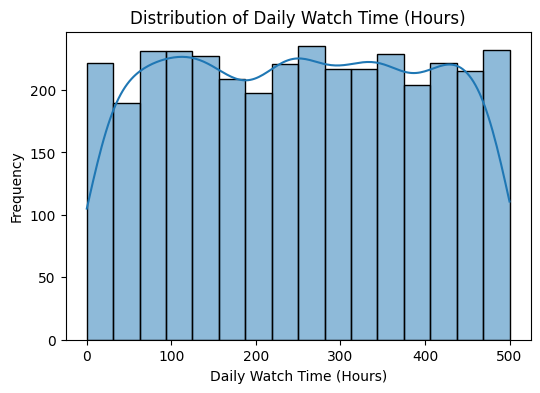

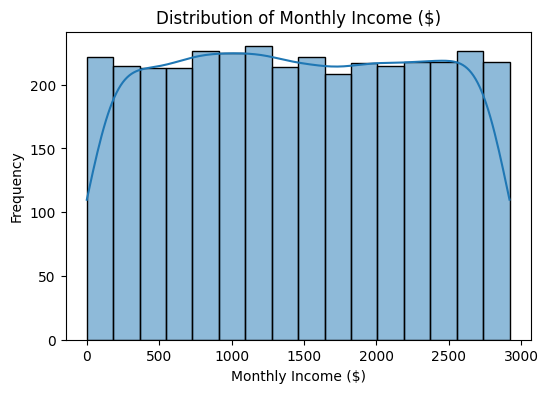

In [79]:
for col in cols_to_scale:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
scaler = StandardScaler()

for col in num_cols:
  df[num_cols] = scaler.fit_transform(df[num_cols])

In [91]:
df.head()

,Customer ID,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Churn Status (Yes/No),Support Queries Logged,Age,Monthly Income ($),Promotional Offers Used,Number of Profiles Created
0,-1.731556,1.127798,1.151454,0.562481,0.391500,-0.452021,0.713888,0.879641,0.531527,0.211226,-0.357688,9,-1.166208,-0.843741,0.790496,-0.721227
1,-1.730566,0.548311,-0.723704,0.652695,-1.480426,0.441806,-0.698553,-0.899636,0.531527,0.211226,-0.357688,6,-1.100941,0.715684,0.790496,-0.721227
2,-1.729577,-0.784510,0.401391,0.902517,0.391500,-1.345847,1.420108,1.472733,0.531527,-0.934962,-0.357688,0,0.726533,0.791637,0.790496,-0.013349
3,-1.728587,1.649337,1.151454,-0.582538,1.140271,-0.452021,-1.404773,-1.492729,0.531527,-0.934962,-0.357688,1,-0.970407,1.709016,0.790496,-0.013349
4,-1.727597,-1.479895,0.026359,0.479207,0.765885,0.441806,1.420108,0.286548,0.531527,1.357414,-0.357688,7,0.073864,0.274202,0.790496,-0.013349


In [6]:
x = df.drop('Engagement Rate (1-10)', axis=1)
y = df['Engagement Rate (1-10)']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_val)
r2 = r2_score(y_val, pred)
print('r2', r2)
print("-" * 15)
mse = mean_squared_error(y_val, pred)
print('mse', mse)

r2 0.5292945975352311
---------------
mse 3.545714285714286


Model: GradientBoosing
R2 Score: 0.7403
MSE: 1.9560
--------------------
Model: XGBoost
R2 Score: 0.6737
MSE: 2.4578
--------------------
Model: LighGBM
R2 Score: 0.7249
MSE: 2.0725
--------------------

In [10]:
from tabulate import tabulate
headers = ['Models', 'MSE', 'R2']
data = [['LogisticRegression', 3.54, 0.52],
        ['XGBoost', 2.45, 0.67],
        ['GradientBoostingRegressor', 1.95, 0.74],
        ['LighGBM', 2.07, 0.72]        
        ]
result = tabulate(data, headers=headers, tablefmt='grid')
print(result)

+---------------------------+-------+------+
| Models                    |   MSE |   R2 |
+===========================+=======+======+
| LogisticRegression        |  3.54 | 0.52 |
+---------------------------+-------+------+
| XGBoost                   |  2.45 | 0.67 |
+---------------------------+-------+------+
| GradientBoostingRegressor |  1.95 | 0.74 |
+---------------------------+-------+------+
| LighGBM                   |  2.07 | 0.72 |
+---------------------------+-------+------+
